In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('connectome_data.csv')
data = data.drop(columns=['node_id', 'dn_position_x', 'dn_position_y', 'dn_position_z', 'dn_region', 'dn_fsname', 'dn_correspondence_id', 'dn_name'])
# data = data.drop(columns=[f'evec{i+1}' for i in range(20,30)])
X = data.drop(columns=['dn_hemisphere'])binbieeeee.   sdfdsfsdfsdfsdfsdfsdfsdfsdfsdfssddddddsdfsdfsdfdsfsdfsssssbinarsdfsdfsdssdfsdfsdfsdfsdfsssdwhhrsjdfhsdfsdfsdfsdfssdfdsfsdfdsfdsfdsf
y = data['dn_hemisphere']

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [52]:
X.head()

,deg_cent,clo_cent,betw_cent,eig_cent,evec1,evec2,evec3,evec4,evec5,evec6,...,evec21,evec22,evec23,evec24,evec25,evec26,evec27,evec28,evec29,evec30
0,-1.004064,-1.143290,0.003176,-0.840298,0.278573,0.091507,-0.468725,-0.007317,-17.838292,-7.858693,...,-0.197206,0.058692,0.022219,0.002425,0.063090,0.114336,0.098513,0.015227,-0.004155,0.002520
1,-1.041514,-2.196688,-0.218531,-0.868578,0.201067,0.071938,-0.376310,-0.006987,-17.587119,-7.808544,...,-0.293208,0.087143,0.033592,0.004436,0.101858,0.187893,0.164776,0.025364,-0.007604,0.004487
2,-0.030373,0.589077,-0.117750,0.388600,0.986741,0.237571,-1.131836,-0.000404,-0.497110,0.486848,...,1.325917,-0.398554,-0.136183,-0.067016,-0.394976,-1.217062,-1.138253,-0.175775,0.040358,-0.157783
3,1.692312,0.876054,0.276130,2.054865,1.592933,0.372906,-1.752745,0.005976,-0.293101,0.317833,...,2.557801,-0.764711,-0.433540,-0.090128,-1.275640,-1.158489,-1.919223,-0.040899,-0.076265,-0.195082
4,-0.966614,-0.981269,-0.218531,-0.751858,0.328883,0.084285,-0.410572,0.002544,-0.138198,0.152364,...,0.816641,-0.245419,-0.105282,-0.041987,-0.305623,-0.649822,-0.713343,-0.079769,0.010214,-0.075720


In [53]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import numpy as np

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=22)

In [54]:
data.head()

,dn_hemisphere,deg_cent,clo_cent,betw_cent,eig_cent,evec1,evec2,evec3,evec4,evec5,...,evec21,evec22,evec23,evec24,evec25,evec26,evec27,evec28,evec29,evec30
0,right,0.002759,0.269117,0.002759,0.000783,0.010035,0.003349,-0.016940,-0.000352,-0.643506,...,-0.007172,0.002099,0.000804,0.000125,0.002258,0.004115,0.003609,0.000544,-0.000177,0.000093
1,right,0.001379,0.212112,0.000000,0.000013,0.007239,0.002643,-0.013606,-0.000340,-0.634444,...,-0.010636,0.003125,0.001215,0.000198,0.003657,0.006769,0.006000,0.000909,-0.000301,0.000164
2,right,0.038621,0.362863,0.001254,0.034249,0.035585,0.008619,-0.040864,-0.000103,-0.017850,...,0.047781,-0.014398,-0.004911,-0.002380,-0.014268,-0.043921,-0.041013,-0.006347,0.001429,-0.005691
3,right,0.102069,0.378392,0.006155,0.079626,0.057456,0.013502,-0.063266,0.000128,-0.010489,...,0.092227,-0.027609,-0.015639,-0.003214,-0.046042,-0.041807,-0.069189,-0.001481,-0.002778,-0.007037
4,right,0.004138,0.277884,0.000000,0.003191,0.011850,0.003088,-0.014842,0.000004,-0.004900,...,0.029407,-0.008873,-0.003796,-0.001477,-0.011044,-0.023455,-0.025682,-0.002884,0.000342,-0.002730


In [55]:
# Define the model
model = XGBClassifier(random_state=22)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    "n_estimators": [100, 150],
    "max_depth": [10, 12],
    "subsample": [0.6, 0.7],
}

# RandomizedSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, scoring='accuracy', n_iter=8, cv=cv, random_state=22, n_jobs=-1, verbose=3
)
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Train/Test Accuracy
train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=10, n_estimators=100, subsample=0.6;, score=0.879 total time=  24.6s
[CV 5/5] END max_depth=10, n_estimators=100, subsample=0.7;, score=0.887 total time=  24.5s
[CV 5/5] END max_depth=10, n_estimators=100, subsample=0.6;, score=0.882 total time=  24.7s
[CV 2/5] END max_depth=10, n_estimators=100, subsample=0.6;, score=0.883 total time=  24.8s
[CV 3/5] END max_depth=10, n_estimators=100, subsample=0.6;, score=0.882 total time=  24.9s
[CV 4/5] END max_depth=10, n_estimators=100, subsample=0.6;, score=0.882 total time=  24.9s
[CV 3/5] END max_depth=10, n_estimators=100, subsample=0.7;, score=0.887 total time=  24.9s
[CV 2/5] END max_depth=10, n_estimators=100, subsample=0.7;, score=0.884 total time=  25.0s
[CV 4/5] END max_depth=10, n_estimators=100, subsample=0.7;, score=0.883 total time=  25.0s
[CV 1/5] END max_depth=10, n_estimators=100, subsample=0.7;, score=0.883 total time=  25.1s
[CV 1/5] END max_dep

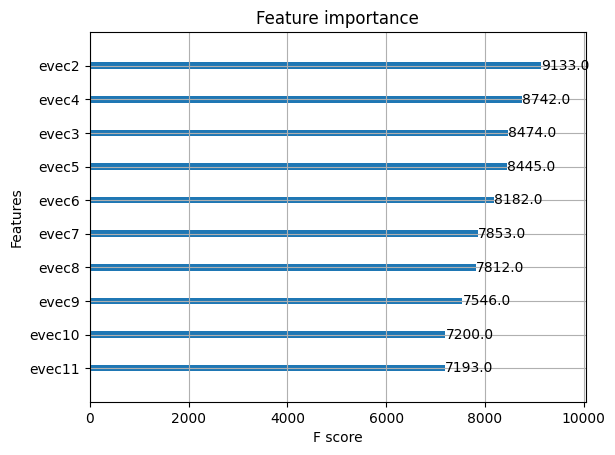

In [56]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(best_model, importance_type='weight', max_num_features=10)
plt.show()

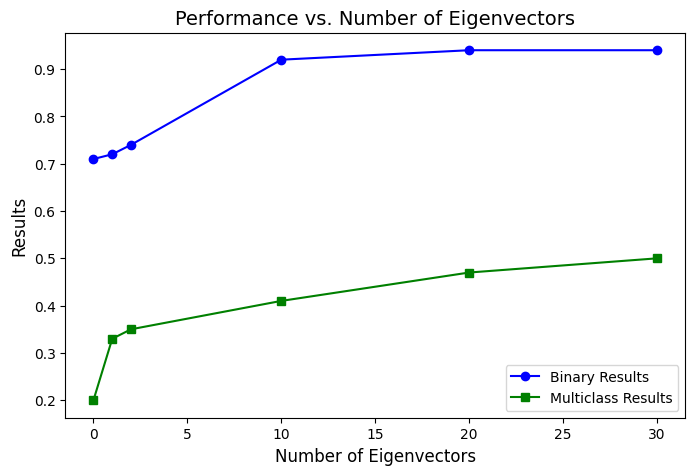

In [62]:
binary_results = [0.71, 0.72, 0.74, 0.92, 0.94, 0.94]
multiclass_results = [0.20, 0.33, 0.35, 0.41, 0.47, 0.50]

num_evecs = [0, 1, 2, 10, 20, 30]

plt.figure(figsize=(8, 5))
plt.plot(num_evecs, binary_results, marker='o', label='Binary Results', color='blue')
plt.plot(num_evecs, multiclass_results, marker='s', label='Multiclass Results', color='green')

plt.xlabel('Number of Eigenvectors', fontsize=12)
plt.ylabel('Results', fontsize=12)
plt.title('Performance vs. Number of Eigenvectors', fontsize=14)
plt.legend()

plt.show()